<a href="https://colab.research.google.com/github/rahulcheeti/machine-learning/blob/master/hw1prog5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


x_train shape: (60000, 784)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.5352 - acc: 0.8413 - val_loss: 0.2876 - val_acc: 0.9161
Epoch 2/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.2632 - acc: 0.9208 - val_loss: 0.2293 - val_acc: 0.9328
Epoch 3/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.2094 - acc: 0.9379 - val_loss: 0.1908 - val_acc: 0.9449
Epoch 4/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.1752 - acc: 0.9474 - val_loss: 0.1642 - val_acc: 0.9495
Epoch 5/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.1513 - acc: 0.9546 - val_loss: 0.1464 - val_acc: 0.9555
Epoch 6/30
60000/60000 [==============================] - 2s 34us/step - loss:

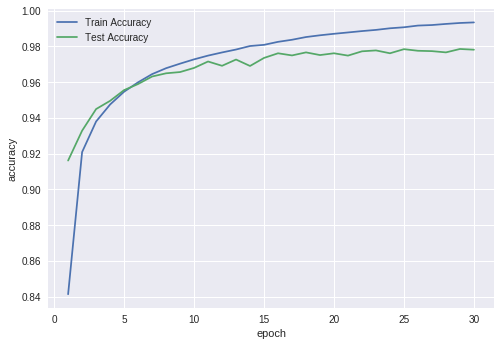

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(60000):
  if y_train[i] == (1 or 2 or 3 or 4 or 5 or 7):
    y_train[i] = 1
  if y_train[i] == (0 or 6 or 9):
    y_train[i] = 2
  if y_train[i] == 8:
    y_train[i] = 3
    
for i in range(10000):
  if y_test[i] == (1 or 2 or 3 or 4 or 5 or 7):
    y_test[i] = 1
  if y_test[i] == (0 or 6 or 9):
    y_test[i] = 2
  if y_test[i] == 8:
    y_test[i] = 3

x_train = (x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = (x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Lenet-5 model
model = Sequential()
#Layer 1

model.add(Dense(units = 100, activation = 'relu'))

model.add(Dense(units = 100, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))


lear_rate = 0.05

sgd = keras.optimizers.SGD(lr=lear_rate)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

History = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)